In [ ]:
!pip install pandas numpy seaborn matplotlib plotly sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report, mean_squared_error


In [2]:
df = pd.read_excel("/content/Soil Data.xlsx")
df = df.drop(columns=["entry_id","tdsValue_without_temp"])
df.head()

,Temp,tdsValue,Voltage,Quantity,Soil
0,29.9375,275.95312,0.81855,1,0
1,29.8750,278.30084,0.82500,1,0
2,29.7500,287.14365,0.85078,1,0
3,29.6875,279.20163,0.82500,1,0
4,29.1875,291.01865,0.85400,1,0


In [4]:
df.columns
print("Columns:", df.columns)

df.describe()
print("Description: ",df.describe())

df.info()
print("Info", df.info())

df.isnull().sum()
print("Null Values:", df.isnull().sum())


Columns: Index(['Temp', 'tdsValue', 'Voltage', 'Quantity', 'Soil '], dtype='object')
Description:                Temp     tdsValue      Voltage     Quantity        Soil 
count  1626.000000  1626.000000  1626.000000  1626.000000  1626.000000
mean     26.278137   341.108962     0.950491     1.511685   246.186962
std       1.111388    36.820004     0.099383     0.500017   164.702733
min      24.562500     2.671130     0.006450     1.000000     0.000000
25%      25.437500   328.106810     0.905570     1.000000   100.000000
50%      25.937500   346.682250     0.970020     2.000000   300.000000
75%      27.187500   361.401142     1.004665     2.000000   400.000000
max      29.937500   433.114870     1.182710     2.000000   500.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Temp      1626 non-null   float64
 1   tdsValue  1626 non-null   float64


Heat Map: 


<Axes: >

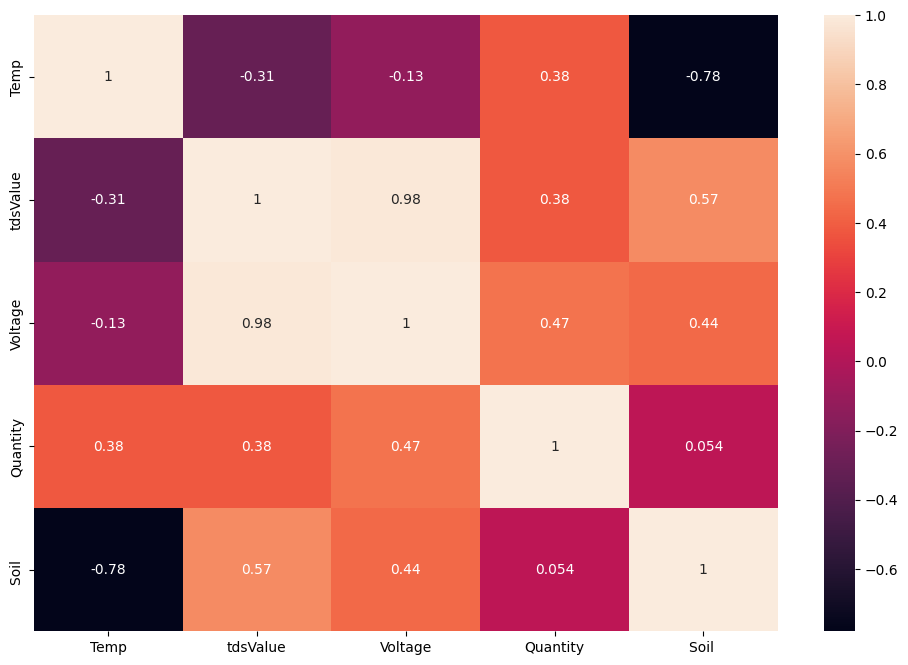

In [5]:
print("Heat Map: ")
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='tdsValue', ylabel='count'>

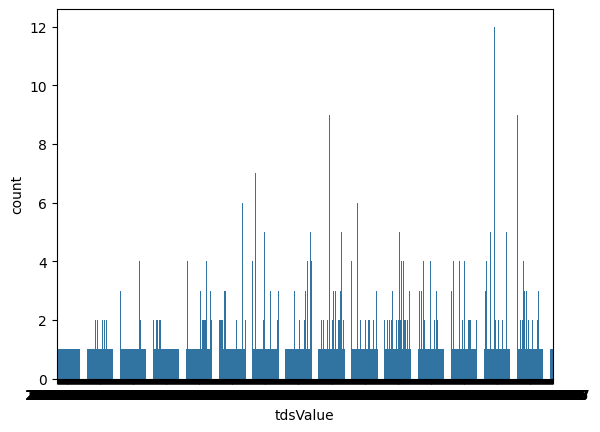

In [6]:
sns.countplot(x="tdsValue", data=df)

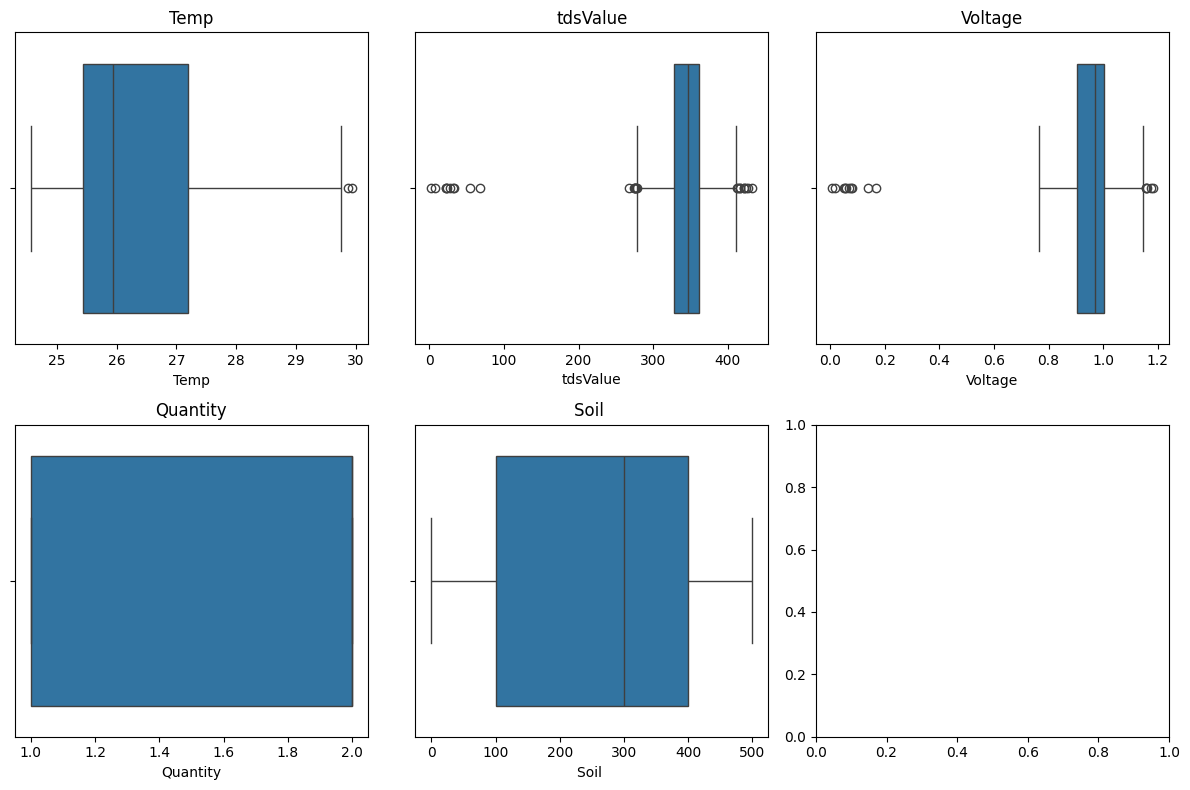

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, col in enumerate(df.columns):
    sns.boxplot(x=col, data=df, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)

plt.tight_layout()
plt.show()


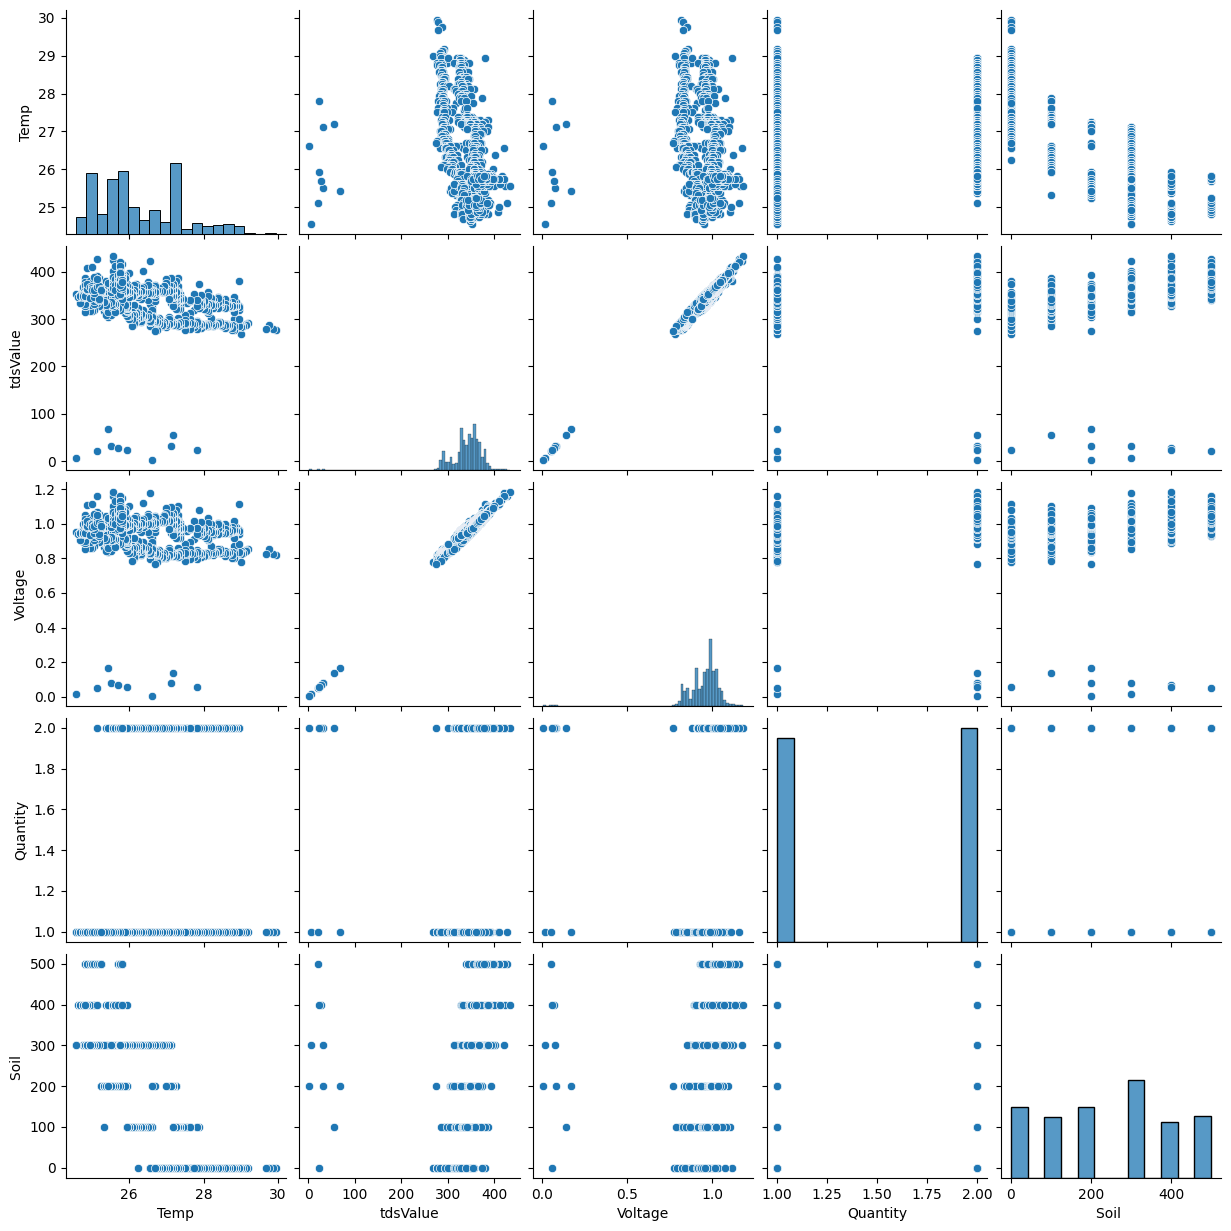

In [8]:
sns.pairplot(df)

In [9]:
x = df.drop("tdsValue", axis=1)
y = df["tdsValue"]

In [10]:
x.shape, y.shape

((1626, 4), (1626,))

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 3.29361886, -1.32801412, -1.02364981, -1.49519498],
       [ 3.23736559, -1.26309372, -1.02364981, -1.49519498],
       [ 3.12485904, -1.00361343, -1.02364981, -1.49519498],
       ...,
       [-0.41909728,  1.0723295 ,  0.97689658,  1.54151129],
       [-0.47535055,  0.78043935,  0.97689658,  1.54151129],
       [-0.41909728,  0.94258936,  0.97689658,  1.54151129]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape

((1300, 4), (326, 4))

In [14]:
plt.figure(figsize=(10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

## **Logistic Regression**

In [ ]:
#Logistic Regression
#Take Value of Sand to test this
x = df.drop("Sand", axis=1)
y = df["Sand"]
#object creation
model_log_r= LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
model_log_r.fit(x_train, y_train)

In [ ]:
#Making Prediction
pred_log_r = model_log_r.predict(x_test)

In [ ]:
#accuracy score
accuracy_score_log = accuracy_score(y_test,pred_log_r)
accuracy_score_log

0.4742857142857143

In [ ]:
#Decision Tree

## **Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth = 8)

In [ ]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [ ]:
pred_dt = model_dt.predict(x_test)

In [ ]:
accuracy_score_dt = accuracy_score(y_test, pred_dt)
accuracy_score_dt

0.8542857142857143

In [ ]:
cm2 = confusion_matrix(y_test, pred_dt)
cm2
# sns.heatmap(cm2/np.sum(cm2))

array([[44,  2,  0,  0,  0,  0],
       [ 1, 45,  2,  1,  0,  0],
       [ 0,  1, 59,  2, 16,  0],
       [ 0,  0,  1, 66,  5,  1],
       [ 0,  0,  6,  5, 37,  2],
       [ 0,  0,  0,  3,  3, 48]])

## **Linear Regression**

In [16]:
model_lin_r = LinearRegression()
model_lin_r.fit(x_train, y_train)
y_pred_lr = model_lin_r.predict(x_test)
# print(pred_lin_r)

mse_lr = mean_squared_error(y_test,y_pred_lr)
intercept = model_lin_r.intercept_
coefficients = model_lin_r.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(len(coefficients))




Linear Regression Equation:
4


## **Polynomial Regression**

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming x_train, x_test, y_train, y_test are already defined

degree = 3
poly_features = PolynomialFeatures(degree=degree)

x_poly_train = poly_features.fit_transform(x_train)
x_poly_test = poly_features.transform(x_test)

poly_regressor = LinearRegression()
poly_regressor.fit(x_poly_train, y_train)
y_pred_pr = poly_regressor.predict(x_poly_test)

mse_pr = mean_squared_error(y_test, y_pred_pr)
print("Mean Squared Error:", mse_pr)

intercept = poly_regressor.intercept_
coefficients = poly_regressor.coef_
print("Linear Regression Equation:")
# print(f"y = {intercept} + {coefficients[0]} * x1 + {coefficients[1]} * x2 + ...")
print(coefficients)





Mean Squared Error: 0.0005239705460114048
Linear Regression Equation:
[-1.72731045e-16 -3.64928606e+00  1.76267893e+01 -3.25950457e-03
  1.82293123e-04  1.81783995e-01 -9.82924882e-01 -1.81176014e-01
 -3.16281372e-03  5.51734512e-01  7.99292176e-01  2.74106725e-02
  1.52392389e-04 -1.52461247e-02 -1.23652838e-02 -4.71661245e-03
  3.50830490e-02 -1.21220756e-02  7.48716805e-04 -2.80035298e-02
 -1.36189028e-02 -2.42817512e-02 -3.64081550e+00 -1.30248792e-02
  5.56593555e-03  6.19632900e-02 -5.68860861e-04  1.25094345e-03
  1.75894198e+01  9.66581714e-03 -1.98772950e-02 -3.26662941e-03
  8.95098801e-04  3.04409491e-03  6.79350704e-03]


## **Random Forest Regressor**

Mean Squared Error: 1   641.3229397823036
Mean Squared Error: 2   128.05918762149128
Mean Squared Error: 3   50.145825460944096
Mean Squared Error: 4   18.43052751722867
Mean Squared Error: 5   10.422843199084314
Mean Squared Error: 6   6.396468229718489
Mean Squared Error: 7   4.415373939701276
Mean Squared Error: 8   3.2143818136683384
Mean Squared Error: 9   2.6309302543270556
Mean Squared Error: 10   2.300758555682364
Mean Squared Error: 11   2.1667691017756585
Mean Squared Error: 12   2.1198143604476556
Mean Squared Error: 13   2.122887097033737
Mean Squared Error: 14   2.1089187686734014
Mean Squared Error: 15   2.1121403108763332
Mean Squared Error: 16   2.100257055070437
Mean Squared Error: 17   2.10097271969113
Mean Squared Error: 18   2.1013960137255445
Mean Squared Error: 19   2.100438337867268
Mean Squared Error: 20   2.101930644344913
Mean Squared Error: 21   2.101930644344913
Mean Squared Error: 22   2.101930644344913
Mean Squared Error: 23   2.101930644344913
Mean Square

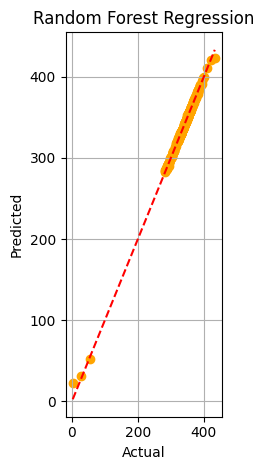

In [28]:
from sklearn.ensemble import RandomForestRegressor

#TESTED TILL 30
rf_regressor = RandomForestRegressor(random_state=42, max_depth = 16)
rf_regressor.fit(x_train, y_train)
y_pred_rf = rf_regressor.predict(x_test)

mse_rfr = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse_rfr)

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

## **Decision Tree Regression**

Mean Squared Error: 1   986.0887651916988
Mean Squared Error: 2   151.62867297643578
Mean Squared Error: 3   68.16730094698518
Mean Squared Error: 4   36.58088228118256
Mean Squared Error: 5   20.284611525117857
Mean Squared Error: 6   11.675704575681612
Mean Squared Error: 7   8.112540842096596
Mean Squared Error: 8   5.324468421390439
Mean Squared Error: 9   3.9465493978748145
Mean Squared Error: 10   2.9763477238653575
Mean Squared Error: 11   2.742786973031788
Mean Squared Error: 12   2.303177644724993
Mean Squared Error: 13   2.212925847314055
Mean Squared Error: 14   2.5091294035677274
Mean Squared Error: 15   2.1476714793782175
Mean Squared Error: 16   2.185109440836193
Mean Squared Error: 17   2.185109440836193
Mean Squared Error: 18   2.185109440836193
Mean Squared Error: 19   2.185109440836193
Mean Squared Error: 20   2.185109440836193
Mean Squared Error: 21   2.185109440836193
Mean Squared Error: 22   2.185109440836193
Mean Squared Error: 23   2.185109440836193
Mean Squared 

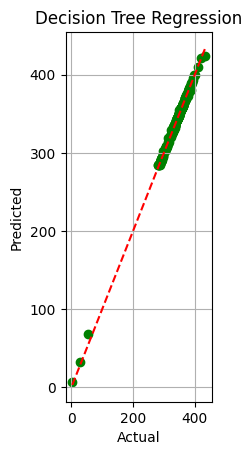

In [27]:
from sklearn.tree import DecisionTreeRegressor

#TESTED TILL 30
dt_regressor = DecisionTreeRegressor(random_state=99, max_depth = 16)
dt_regressor.fit(x_train, y_train)
y_pred_dt = dt_regressor.predict(x_test)
mse_dtr = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse_dtr)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dt, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')
plt.grid(True)

## **KNeighborsRegressor**

Mean Squared Error: 9.907504323918094


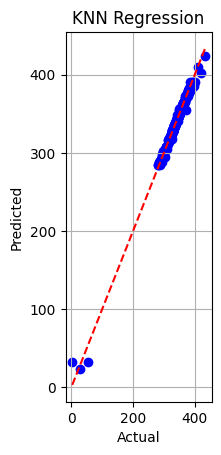

In [25]:
from sklearn.neighbors import KNeighborsRegressor
k = 1
#TESTED TILL 15
knn_regressor = KNeighborsRegressor(n_neighbors=1)
knn_regressor.fit(x_train, y_train)
y_pred_knn = knn_regressor.predict(x_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('KNN Regression')
plt.grid(True)

## **TEST RESULTS**

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from tabulate import tabulate

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_pr = mean_squared_error(y_test, y_pred_pr)

# Calculate RMSE for each model
rmse_lr = np.sqrt(mse_lr)
rmse_rf = np.sqrt(mse_rf)
rmse_dt = np.sqrt(mse_dt)
rmse_knn = np.sqrt(mse_knn)
rmse_pr = np.sqrt(mse_pr)

# Calculate R2 score for each model
r2_lr = r2_score(y_test, y_pred_lr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_knn = r2_score(y_test, y_pred_knn)
r2_pr = r2_score(y_test, y_pred_pr)

data = [
    ["Linear Regression", mse_lr, rmse_lr, r2_lr],
    ["Random Forest Regression", mse_rf, rmse_rf, r2_rf],
    ["Decision Tree Regression", mse_dt, rmse_dt, r2_dt],
    ["KNN Regression", mse_knn, rmse_knn, r2_knn],
    ["Polynomial Regression", mse_pr, rmse_pr, r2_pr]
]

# Define table headers
headers = ["Regression Model", "MSE", "RMSE", "R-squared"]

# Print the table using tabulate
print(tabulate(data, headers=headers, tablefmt="pretty"))



+--------------------------+-----------------------+----------------------+--------------------+
|     Regression Model     |          MSE          |         RMSE         |     R-squared      |
+--------------------------+-----------------------+----------------------+--------------------+
|    Linear Regression     |  0.8273253001342775   |  0.9095742411338821  | 0.999506050229043  |
| Random Forest Regression |   2.101930644344913   |  1.4498036571704849  | 0.9987450545025359 |
| Decision Tree Regression |   2.185109440836193   |  1.478211568360968   | 0.9986953930846285 |
|      KNN Regression      |   9.907504323918094   |   3.14761883396292   | 0.9940847820189227 |
|  Polynomial Regression   | 0.0005239705460114048 | 0.022890402923745244 | 0.9999996871664252 |
+--------------------------+-----------------------+----------------------+--------------------+
